In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

##### Data

In [63]:
# ms data
file_path = 'data/cas_intensities.csv'
data = pd.read_csv(file_path, delimiter=',', index_col = 0)
# only use first repliat
data = data[data["replicate"]==1]
ms_data = data.drop(columns=["replicate"])
ms_data_array=np.array(ms_data)

In [64]:
ms_data

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
sample_key,,,,,,,,,,,,,,,,,,,,,
000920,1.943542e+08,1.240854e+09,1.048295e+08,9.087319e+07,1.831223e+08,1.831223e+08,6.043091e+08,1.943542e+08,1.943542e+08,1.240854e+09,...,2.528854e+08,1.831223e+08,1.048295e+08,4.645706e+08,4.645706e+08,1.893777e+08,1.831223e+08,1.831223e+08,2.528854e+08,2.662124e+08
000922,1.549112e+08,1.029110e+09,1.086362e+08,1.181268e+08,1.913892e+08,1.913892e+08,6.519549e+08,1.549112e+08,1.549112e+08,1.029110e+09,...,1.875943e+08,1.913892e+08,1.086362e+08,4.505443e+08,4.505443e+08,2.602672e+08,1.913892e+08,1.913892e+08,1.875943e+08,2.698756e+08
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,2.299686e+08,1.932470e+08,1.523761e+08,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08
000911,1.759171e+08,9.992782e+08,1.654314e+08,1.787409e+08,2.531031e+08,2.531031e+08,8.800410e+08,1.759171e+08,1.759171e+08,9.992782e+08,...,2.857401e+08,2.531031e+08,1.654314e+08,4.831389e+08,4.831389e+08,3.724425e+08,2.531031e+08,2.531031e+08,2.857401e+08,3.321024e+08
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,1.823817e+08,1.855528e+08,1.090820e+08,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000596,2.413772e+08,2.413874e+09,9.689814e+07,9.213682e+07,1.471158e+08,1.471158e+08,6.822826e+08,2.413772e+08,2.413772e+08,2.413874e+09,...,2.592504e+08,1.471158e+08,9.689814e+07,5.506742e+08,5.506742e+08,1.736489e+08,1.471158e+08,1.471158e+08,2.592504e+08,3.138085e+08
000804,3.452753e+08,3.397598e+09,1.905095e+08,2.577871e+08,2.881055e+08,2.881055e+08,1.122339e+09,3.452753e+08,3.452753e+08,3.397598e+09,...,3.308782e+08,2.881055e+08,1.905095e+08,5.763415e+08,5.763415e+08,3.355894e+08,2.881055e+08,2.881055e+08,3.308782e+08,5.460406e+08
000853,3.740657e+08,1.855998e+09,1.829394e+08,1.613276e+08,2.186666e+08,2.186666e+08,6.303671e+08,3.740657e+08,3.740657e+08,1.855998e+09,...,3.798451e+08,2.186666e+08,1.829394e+08,2.239344e+08,2.239344e+08,1.979400e+08,2.186666e+08,2.186666e+08,3.798451e+08,3.843281e+08


In [87]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])
panelist_data_df

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste
samplekey,,,,,,,,,
000656,50,20,60,50,30,30,50,40,40
000657,30,40,60,40,40,30,10,30,60
000658,30,50,50,50,40,40,10,40,70
000661,60,70,60,50,50,60,0,40,60
000662,40,60,50,50,50,40,0,30,60
...,...,...,...,...,...,...,...,...,...
000926,40,30,40,40,30,20,40,20,60
000927,40,70,60,70,40,50,0,40,80
000929,20,60,30,40,30,50,0,40,30


## Normalize


In [95]:
# Standardization of the dataset before performing PCA
# Z-Transformation:  scaling the data to have a mean (average) of 0 and a standard deviation of 1.
scaler = StandardScaler()
panelist_data_df_scaled = scaler.fit_transform(panelist_data_df)
panelist_data_df_scaled = pd.DataFrame(panelist_data_df_scaled, columns=panelist_data_df.columns, index=panelist_data_df.index)
panelist_data_df_scaled

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste
samplekey,,,,,,,,,
000656,0.719232,-1.927820,0.730836,0.100385,-0.631643,-0.689731,1.951986,0.393120,-1.117371
000657,-1.115288,-0.442773,0.730836,-0.805988,0.494290,-0.689731,-0.084585,-0.592448,0.500577
000658,-1.115288,0.299751,-0.050143,0.100385,0.494290,0.236352,-0.084585,0.393120,1.309551
000661,1.636492,1.784798,0.730836,0.100385,1.620222,2.088518,-0.593727,0.393120,0.500577
000662,-0.198028,1.042274,-0.050143,0.100385,1.620222,0.236352,-0.593727,-0.592448,0.500577
...,...,...,...,...,...,...,...,...,...
000926,-0.198028,-1.185297,-0.831122,-0.805988,-0.631643,-1.615814,1.442843,-1.578016,0.500577
000927,-0.198028,1.784798,0.730836,1.913131,0.494290,1.162435,-0.593727,0.393120,2.118525
000929,-2.032548,1.042274,-1.612101,-0.805988,-0.631643,1.162435,-0.593727,0.393120,-1.926345


In [98]:
X_scaled_ms = scaler.fit_transform(ms_data)
X_scaled_ms_df = pd.DataFrame(X_scaled_ms, columns = ms_data.columns, index= ms_data.index)

In [99]:
X_scaled_ms_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
sample_key,,,,,,,,,,,,,,,,,,,,,
000920,-0.584970,-0.743947,-0.710110,-0.848995,-0.096507,-0.096507,-0.498018,-0.584970,-0.584970,-0.743947,...,-0.329290,-0.096507,-0.710110,0.358177,0.358177,-0.556814,-0.096507,-0.096507,-0.329290,-0.537598
000922,-1.228631,-1.029474,-0.667295,-0.538223,-0.030518,-0.030518,-0.317983,-1.228631,-1.228631,-1.029474,...,-0.839040,-0.030518,-0.667295,0.262589,0.262589,-0.011682,-0.030518,-0.030518,-0.839040,-0.493399
000927,-1.000645,-0.930157,-0.175323,-0.042034,-0.015688,-0.015688,0.009879,-1.000645,-1.000645,-0.930157,...,-0.508209,-0.015688,-0.175323,0.388752,0.388752,-0.177247,-0.015688,-0.015688,-0.508209,-0.673928
000911,-0.885840,-1.069701,-0.028482,0.152957,0.462100,0.462100,0.543869,-0.885840,-0.885840,-1.069701,...,-0.072782,0.462100,-0.028482,0.484720,0.484720,0.850933,0.462100,0.462100,-0.072782,0.257405
000925,-1.280845,-0.976521,-0.662280,-0.445814,-0.077106,-0.077106,-0.485031,-1.280845,-1.280845,-0.976521,...,-0.879736,-0.077106,-0.662280,0.272683,0.272683,-0.210190,-0.077106,-0.077106,-0.879736,-0.787943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000596,0.182387,0.837817,-0.799320,-0.834585,-0.383921,-0.383921,-0.203386,0.182387,0.182387,0.837817,...,-0.279596,-0.383921,-0.799320,0.944971,0.944971,-0.677767,-0.383921,-0.383921,-0.279596,0.036678
000804,1.877875,2.164324,0.253589,1.054318,0.741500,0.741500,1.459424,1.877875,1.877875,2.164324,...,0.279627,0.741500,0.253589,1.119893,1.119893,0.567537,0.741500,0.741500,0.279627,2.838696
000853,2.347699,0.085547,0.168443,-0.045606,0.187219,0.187219,-0.399555,2.347699,2.347699,0.085547,...,0.661928,0.187219,0.168443,-1.281753,-1.281753,-0.490971,0.187219,0.187219,0.661928,0.887538


### UMAP

In [ ]:
import umap
from umap import UMAP
import sklearn.cluster as cluster

In [ ]:
standard_umap = UMAP(random_state=42).fit_transform(X_scaled)

In [ ]:
n_clusters=10
kmeans_labels = cluster.KMeans(n_clusters=n_clusters).fit_predict(X_scaled)

In [ ]:
# n_clusters = 10
plt.title("n_clusters = 10")
plt.scatter(standard_umap[:, 0], standard_umap[:, 1], c=kmeans_labels, s=1, cmap='Spectral');


In [ ]:
def plot_umap(file, n_clusters):
    standard_umap = UMAP(random_state=42).fit_transform(file)
    n_clusters=n_clusters
    kmeans_labels = cluster.KMeans(n_clusters=n_clusters).fit_predict(file)
    plt.scatter(standard_umap[:, 0], standard_umap[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');
    plt.scatter(standard_umap[:, 0], standard_umap[:, 1], c=kmeans_labels, s=1, cmap='Spectral');



In [ ]:
plt.title("n_clusters = 8")
plot_umap(X_scaled, 8)

In [ ]:
plt.title("n_clusters = 5")
plot_umap(X_scaled, 5)

In [ ]:
plt.title("n_clusters = 4")
plot_umap(X_scaled, 4)

#### analyse data 

In [ ]:
'''
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'floral', data = panelist_data_df)

plt.subplot(4,3,2)
sns.boxplot(x = 'fruit', data = panelist_data_df)

plt.subplot(4,3,3)
sns.boxplot(x = 'wood', data = panelist_data_df)

plt.subplot(4,3,4)
sns.boxplot(x = 'complexity', data = panelist_data_df)

plt.subplot(4,3,5)
sns.boxplot(x = 'malt', data = panelist_data_df)

plt.subplot(4,3,6)
sns.boxplot(x = 'sweet', data = panelist_data_df)

plt.subplot(4,3,7)
sns.boxplot(x = 'peat', data = panelist_data_df)

plt.subplot(4,3,8)
sns.boxplot(x = 'dried_fruits', data = panelist_data_df)

plt.subplot(4,3,9)
sns.boxplot(x = 'aftertaste', data = panelist_data_df)

# histogram / density plot'''

In [ ]:
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.histplot(x='floral', data=panelist_data_df)

plt.subplot(4, 3, 2)
sns.histplot(x='fruit', data=panelist_data_df)

plt.subplot(4, 3, 3)
sns.histplot(x='wood', data=panelist_data_df)

plt.subplot(4, 3, 4)
sns.histplot(x='complexity', data=panelist_data_df)

plt.subplot(4, 3, 5)
sns.histplot(x='malt', data=panelist_data_df)

plt.subplot(4, 3, 6)
sns.histplot(x='sweet', data=panelist_data_df)

plt.subplot(4, 3, 7)
sns.histplot(x='peat', data=panelist_data_df)

plt.subplot(4, 3, 8)
sns.histplot(x='dried_fruits', data=panelist_data_df)

plt.subplot(4, 3, 9)
sns.histplot(x='aftertaste', data=panelist_data_df)

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.kdeplot(x='floral', data=panelist_data_df)

plt.subplot(4, 3, 2)
sns.kdeplot(x='fruit', data=panelist_data_df)

plt.subplot(4, 3, 3)
sns.kdeplot(x='wood', data=panelist_data_df)

plt.subplot(4, 3, 4)
sns.kdeplot(x='complexity', data=panelist_data_df)

plt.subplot(4, 3, 5)
sns.kdeplot(x='malt', data=panelist_data_df)

plt.subplot(4, 3, 6)
sns.kdeplot(x='sweet', data=panelist_data_df)

plt.subplot(4, 3, 7)
sns.kdeplot(x='peat', data=panelist_data_df)

plt.subplot(4, 3, 8)
sns.kdeplot(x='dried_fruits', data=panelist_data_df)

plt.subplot(4, 3, 9)
sns.kdeplot(x='aftertaste', data=panelist_data_df)

plt.tight_layout()
plt.show()


In [ ]:
ms_data

In [ ]:
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.kdeplot(x='6485-40-1', data=ms_data)

plt.subplot(4, 3, 2)
sns.kdeplot(x='3033-23-6', data=ms_data)

plt.subplot(4, 3, 3)
sns.kdeplot(x='21284-22-0', data=ms_data)

plt.subplot(4, 3, 4)
sns.kdeplot(x='38427-78-0', data=ms_data)

plt.subplot(4, 3, 5)
sns.kdeplot(x='495-61-4', data=ms_data)

plt.subplot(4, 3, 6)
sns.kdeplot(x='29873-99-2', data=ms_data)

plt.subplot(4, 3, 7)
sns.kdeplot(x='6909-30-4', data=ms_data)

plt.subplot(4, 3, 8)
sns.kdeplot(x='99-49-0', data=ms_data)

plt.subplot(4, 3, 9)
sns.kdeplot(x='2244-16-8', data=ms_data)

plt.tight_layout()
plt.show()


### kmeans and Pca

In [103]:
from sklearn.decomposition import PCA


<AxesSubplot:>

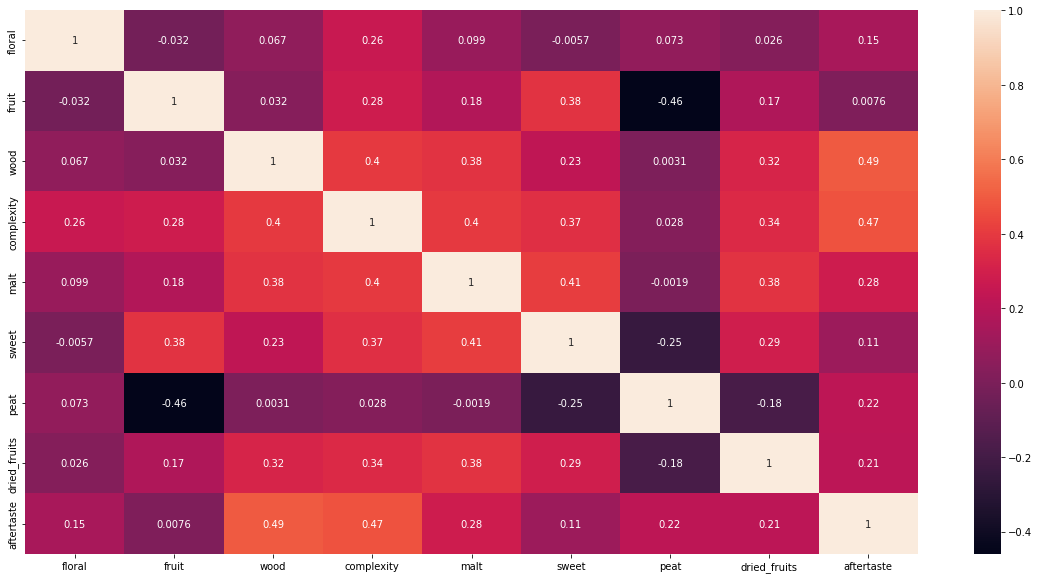

In [101]:
# Let's see the correlation matrix 
'''plt.figure(figsize = (20,10))       
sns.heatmap(panelist_data_df_scaled.corr(),annot = True)'''

In [179]:
def get_comp_pca(df):
    pca = PCA()
    pca.fit(df)
    plt.figure(figsize=(10,10))
    plt.plot(range(0,len(df.columns)), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
    plt.title('explained variance by components')
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')


In [190]:
pca = PCA()
pca.fit(panelist_data_df_scaled)
pca.explained_variance_ratio_.cumsum()

array([0.31706758, 0.50817251, 0.61970853, 0.70594264, 0.79060448,
       0.85750723, 0.91461462, 0.95972862, 1.        ])

Text(0, 0.5, 'cumulative explained variance')

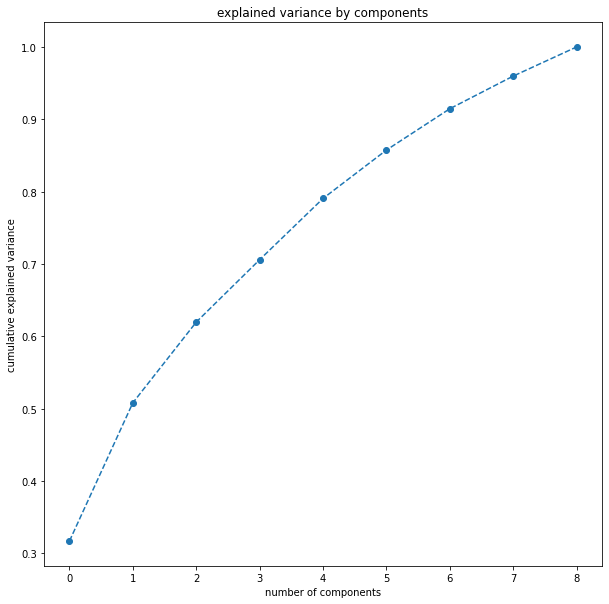

In [180]:
#  we need to decide how many features we’d like to keep based on the cumulative variance plot.
pca = PCA()
pca.fit(panelist_data_df_scaled)
plt.figure(figsize=(10,10))
plt.plot(range(0,len(panelist_data_df_scaled.columns)), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


presereve 80 % of variance so 5 components

In [125]:
def score_pca(df,n):
    pca = PCA(n_components=n)
    pca.fit(df)
    scores_pca = pca.transform(df)
    return scores_pca

In [126]:
def find_cluster_pca(scores_pca):
    # tells how many clusters should we use? 
    wcss = []
    for i in range(1,21):
        kmeans_pca = KMeans(n_clusters=i,init = 'k-means++', random_state=42)
        kmeans_pca.fit(scores_pca)
        wcss.append(kmeans_pca.inertia_)
        plt.figure(figsize=(10,10))
    plt.plot(range(1,21), wcss, marker='o', linestyle='--')
    plt.title('K-meands with pca clustering')
    plt.xlabel('number of cluster')
    plt.ylabel('wcss')

In [127]:
scores_pca_panelist = score_pca(panelist_data_df_scaled, 5)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

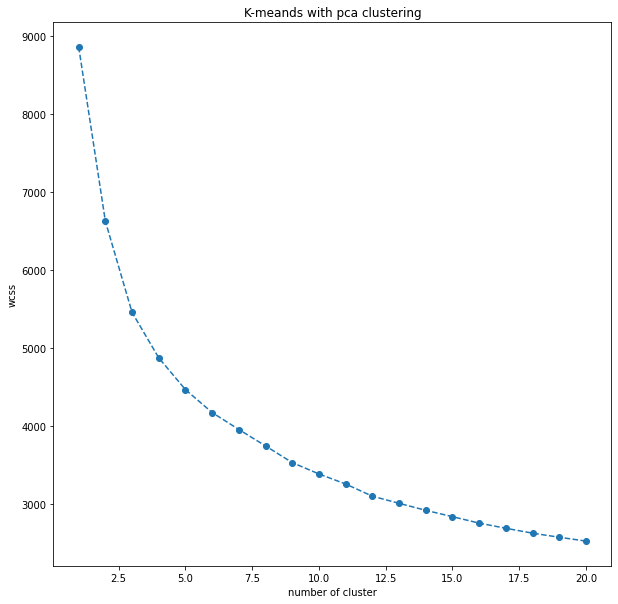

In [128]:
find_cluster_pca(scores_pca_panelist)

=> between 4 or 5 clusters

now perform pca

In [121]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca_panelist)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [130]:
def plot_cluster(df, scores_pca):
    # create new dataframe
    df_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
    df_pca_kmeans.columns.values[-5:] = ['component 1', 'component 2', 'component 3','component 4', 'component 5']
    df_pca_kmeans['kmeans PCA'] = kmeans_pca.labels_
    df_pca_kmeans['color'] = df_pca_kmeans['kmeans PCA'].map({0: 'first', 1:'second', 2:'third', 3:'fourth'})
    x_axis = df_pca_kmeans['component 2']
    y_axis = df_pca_kmeans['component 1']
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=x_axis, y=y_axis, hue=df_pca_kmeans['color'], palette=['g','r','c','m'])
    plt.title('clusters by PCA components 1 and 2')
    plt.show()

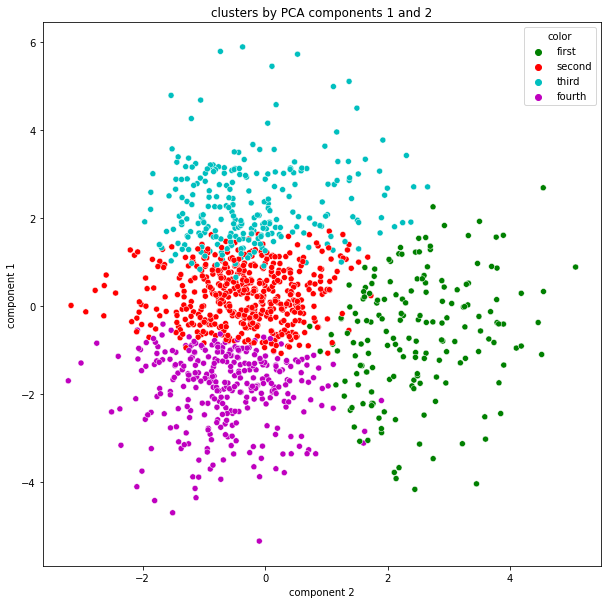

In [131]:
plot_cluster(panelist_data_df_scaled, scores_pca_panelist )

In [182]:
#  we need to decide how many features we’d like to keep based on the cumulative variance plot.
pca = PCA()
pca.fit(ms_data)

PCA()

In [184]:
ms_data

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
sample_key,,,,,,,,,,,,,,,,,,,,,
000920,1.943542e+08,1.240854e+09,1.048295e+08,9.087319e+07,1.831223e+08,1.831223e+08,6.043091e+08,1.943542e+08,1.943542e+08,1.240854e+09,...,2.528854e+08,1.831223e+08,1.048295e+08,4.645706e+08,4.645706e+08,1.893777e+08,1.831223e+08,1.831223e+08,2.528854e+08,2.662124e+08
000922,1.549112e+08,1.029110e+09,1.086362e+08,1.181268e+08,1.913892e+08,1.913892e+08,6.519549e+08,1.549112e+08,1.549112e+08,1.029110e+09,...,1.875943e+08,1.913892e+08,1.086362e+08,4.505443e+08,4.505443e+08,2.602672e+08,1.913892e+08,1.913892e+08,1.875943e+08,2.698756e+08
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,2.299686e+08,1.932470e+08,1.523761e+08,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08
000911,1.759171e+08,9.992782e+08,1.654314e+08,1.787409e+08,2.531031e+08,2.531031e+08,8.800410e+08,1.759171e+08,1.759171e+08,9.992782e+08,...,2.857401e+08,2.531031e+08,1.654314e+08,4.831389e+08,4.831389e+08,3.724425e+08,2.531031e+08,2.531031e+08,2.857401e+08,3.321024e+08
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,1.823817e+08,1.855528e+08,1.090820e+08,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000596,2.413772e+08,2.413874e+09,9.689814e+07,9.213682e+07,1.471158e+08,1.471158e+08,6.822826e+08,2.413772e+08,2.413772e+08,2.413874e+09,...,2.592504e+08,1.471158e+08,9.689814e+07,5.506742e+08,5.506742e+08,1.736489e+08,1.471158e+08,1.471158e+08,2.592504e+08,3.138085e+08
000804,3.452753e+08,3.397598e+09,1.905095e+08,2.577871e+08,2.881055e+08,2.881055e+08,1.122339e+09,3.452753e+08,3.452753e+08,3.397598e+09,...,3.308782e+08,2.881055e+08,1.905095e+08,5.763415e+08,5.763415e+08,3.355894e+08,2.881055e+08,2.881055e+08,3.308782e+08,5.460406e+08
000853,3.740657e+08,1.855998e+09,1.829394e+08,1.613276e+08,2.186666e+08,2.186666e+08,6.303671e+08,3.740657e+08,3.740657e+08,1.855998e+09,...,3.798451e+08,2.186666e+08,1.829394e+08,2.239344e+08,2.239344e+08,1.979400e+08,2.186666e+08,2.186666e+08,3.798451e+08,3.843281e+08


Text(0, 0.5, 'cumulative explained variance')

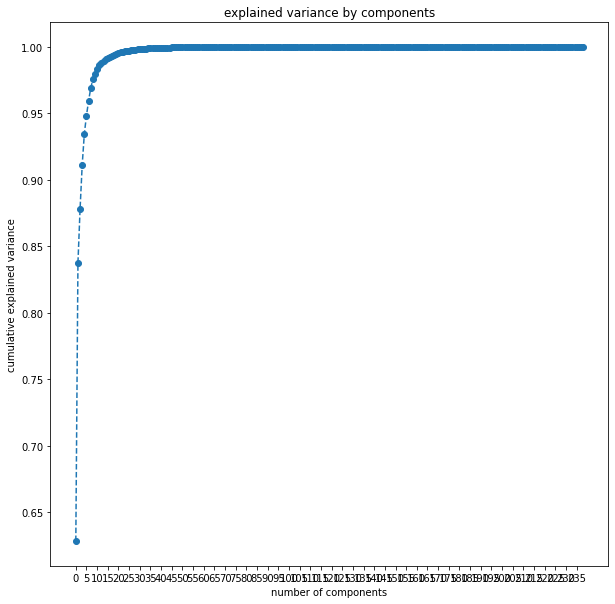

In [211]:
#  we need to decide how many features we’d like to keep based on the cumulative variance plot.
pca = PCA()
pca.fit(ms_data)
plt.figure(figsize=(10,10))
plt.plot(range(0,len(ms_data.index)), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xticks(range(0,len(ms_data.index),5))
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


~ 5 components

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

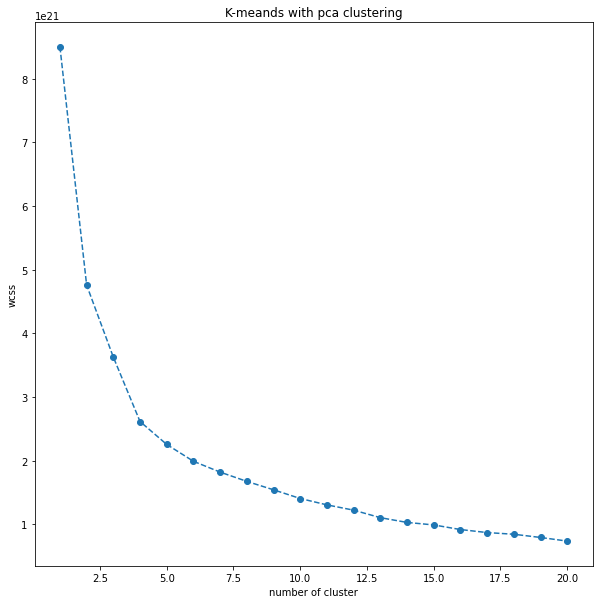

In [215]:
scores_pca_ms = score_pca(ms_data, 5)
find_cluster_pca(scores_pca_ms)


In [216]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca_ms)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

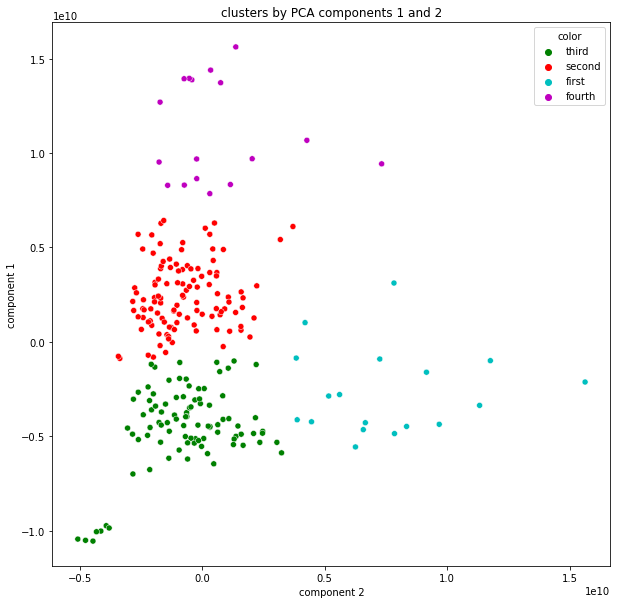

In [217]:
plot_cluster(ms_data, scores_pca_ms )

### TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_TSNE = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_scaled)

In [ ]:
kmeans_tsne = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_tsne.fit(X_TSNE)


In [ ]:
# create new dataframe
df_TSNE = pd.concat([X_scaled_df.reset_index(drop=True),  pd.DataFrame(X_TSNE)],axis=1)
df_TSNE.columns.values[-2:] = ['component 1', 'component 2']
df_TSNE['kmeans TSNE'] = kmeans_tsne.labels_
df_TSNE['panelist'] = panelist_data_df['panelist']
df_TSNE

In [ ]:
x_axis = df_TSNE['component 2']
y_axis = df_TSNE['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, data=df_TSNE, hue = df_TSNE['kmeans TSNE'], palette=['g','r','c','m'])
plt.title('clusters by PCA components 1 and 2 using TSNE')
plt.show()

In [ ]:
X_ms_TSNE = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_scaled_ms)
kmeans_tsne = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_tsne.fit(X_ms_TSNE)
# create new dataframe
df_ms_TSNE = pd.concat([X_scaled_ms_df.reset_index(drop=True),  pd.DataFrame(X_ms_TSNE)],axis=1)

In [ ]:
df_ms_TSNE.columns.values[-2:] = ['component 1', 'component 2']
df_ms_TSNE['kmeans TSNE'] = kmeans_tsne.labels_


In [ ]:
df_ms_TSNE

In [ ]:
x_axis = df_ms_TSNE['component 2']
y_axis = df_ms_TSNE['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, data=df_ms_TSNE, hue = df_ms_TSNE['kmeans TSNE'], palette=['g','r','c','m'])
plt.title('clusters by PCA components 1 and 2 using TSNE')
plt.show()

## Fuzzy approach

In [ ]:
import skfuzzy as fuzz


In [ ]:
# Define the number of clusters
k = 4

# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, k, 2, error=0.005, maxiter=1000, init=None
)

# Extract the cluster labels
cluster_labels = np.argmax(u, axis=0)

# Print the cluster labels
print(cluster_labels)



In [ ]:
x_axis = df_pca_kmeans['component 2']
y_axis = df_pca_kmeans['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=cluster_labels, palette=['g','r','c','m'])
plt.title('fuzzy clustering')
plt.show()

In [ ]:

# Define the number of clusters
k = 12

# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, k, 2, error=0.005, maxiter=1000, init=None
)

# Extract the cluster labels
cluster_labels = np.argmax(u, axis=0)

# Print the cluster labels
print(cluster_labels)


x_axis = df_pca_kmeans['component 2']
y_axis = df_pca_kmeans['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=cluster_labels, palette='Spectral')
plt.title('fuzzy clustering')
plt.show()

In [ ]:
# Define the number of clusters
k = 3

# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, k, 2, error=0.005, maxiter=1000, init=None
)

# Extract the cluster labels
cluster_labels = np.argmax(u, axis=0)

# Print the cluster labels
print(cluster_labels)
x_axis = df_pca_kmeans['component 2']
y_axis = df_pca_kmeans['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=cluster_labels, palette=(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']))
plt.title('fuzzy clustering')
plt.show()


### Chat GPT dataset

In [ ]:
chat_gpt_data = pd.read_table("data/csv_WBS_CahtData_professional_HH.csv", delimiter=';')
chat_gpt_data.columns = ["Whisky Name","floral", 'fruit', 'wood', 'complexity' , 'malt' ,'sweet', 'peat', 'dried_fruits', 'aftertaste' ]
X_gpt = chat_gpt_data.drop('Whisky Name',axis = 1)  
y_gpt = chat_gpt_data['Whisky Name']

scaler = StandardScaler()
X_gpt_scaled = scaler.fit_transform(X_gpt)

##### Compare flavors

In [ ]:
plt.figure(figsize=(25,25), dpi=200)
plt.suptitle("Compare ChatGPT (blue) with panelist data (red) ", size = 16)

plt.subplot(4,3,1)
sns.histplot(x = 'floral', data = chat_gpt_data)
sns.histplot(x = 'floral', data = panelist_data_df, color="r")

plt.subplot(4,3,2)
sns.histplot(x = 'fruit', data = chat_gpt_data)
sns.histplot(x = 'fruit', data = panelist_data_df, color="r")

plt.subplot(4,3,3)
sns.histplot(x = 'wood', data = chat_gpt_data)
sns.histplot(x = 'wood', data = panelist_data_df, color="r")

plt.subplot(4,3,4)
sns.histplot(x = 'complexity', data = chat_gpt_data)
sns.histplot(x = 'complexity', data = panelist_data_df, color="r")

plt.subplot(4,3,5)
sns.histplot(x = 'malt', data = chat_gpt_data)
sns.histplot(x = 'malt', data = panelist_data_df, color="r")

plt.subplot(4,3,6)
sns.histplot(x = 'sweet', data = chat_gpt_data)
sns.histplot(x = 'sweet', data = panelist_data_df, color="r")

plt.subplot(4,3,7)
sns.histplot(x = 'peat', data = chat_gpt_data)
sns.histplot(x = 'peat', data = panelist_data_df, color="r")

plt.subplot(4,3,8)
sns.histplot(x = 'dried_fruits', data = chat_gpt_data)
sns.histplot(x = 'dried_fruits', data = panelist_data_df, color="r")

plt.subplot(4,3,9)
sns.histplot(x = 'aftertaste', data = chat_gpt_data)
sns.histplot(x = 'aftertaste', data = panelist_data_df, color="r")



plt.show()

In [ ]:
X_scaled_gpt = pd.DataFrame(X_gpt_scaled,columns=X_gpt.columns)
X_scaled_gpt.head()	

In [ ]:
'''# perform pca
pca = PCA()
pca.fit(X_scaled_gpt)
#  we need to decide how many features we’d like to keep based on the cumulative variance plot.
# plt.figure(figsize=(10,10))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# presereve 80 % of variance so 5 components
pca = PCA(n_components=5)
pca.fit(X_scaled_gpt)
scores_pca = pca.transform(X_scaled_gpt)
# how many clusters should we use? 
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i,init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10,10))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.title('K-means with pca clustering')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
#  => between 4 or 5 clusters'''

In [ ]:
pca = PCA(n_components=5)
pca.fit(X_scaled_gpt)
scores_pca_gpt = pca.transform(X_scaled_gpt)
kmeans_pca_gpt = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca_gpt.fit(scores_pca_gpt)

In [ ]:
# create new dataframe
gpt_pca_kmeans = pd.concat([X_scaled_gpt.reset_index(drop=True), pd.DataFrame(scores_pca_gpt)], axis = 1)
gpt_pca_kmeans.columns.values[-5:] = ['component 1', 'component 2', 'component 3','component 4', 'component 5']
gpt_pca_kmeans['kmeans PCA'] = kmeans_pca_gpt.labels_
gpt_pca_kmeans['color'] = gpt_pca_kmeans['kmeans PCA'].map({0: 'first', 1:'second', 2:'third', 3:'fourth'})

In [ ]:
x_axis = gpt_pca_kmeans['component 2']
y_axis = gpt_pca_kmeans['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=gpt_pca_kmeans['color'], palette=['g','r','c','m'])
plt.title('chat gpt clusters by PCA components 1 and 2')
plt.show()

In [ ]:
X_TSNE_gpt = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_scaled_gpt)
kmeans_tsne_gpt = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_tsne_gpt.fit(X_TSNE_gpt)

In [ ]:
gpt_TSNE = pd.concat([X_scaled_gpt.reset_index(drop=True),  pd.DataFrame(X_TSNE_gpt)],axis=1)
gpt_TSNE.columns.values[-2:] = ['component 1', 'component 2']
gpt_TSNE['kmeans TSNE'] = kmeans_tsne_gpt.labels_
gpt_TSNE['Whisky Name'] = chat_gpt_data['Whisky Name']
gpt_TSNE

In [ ]:
x_axis = gpt_TSNE['component 2']
y_axis = gpt_TSNE['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, data=gpt_TSNE, hue = gpt_TSNE['kmeans TSNE'], palette=['g','r','c','m'])
plt.title('clusters by PCA components 1 and 2 using TSNE')
plt.show()

#### check differences between panelists

In [ ]:
'''with open('panelist_1.txt', 'w') as f:
    for line in lines :
        if line.startswith('1'):
            f.write(line)

with open('panelist_2.txt', 'w') as f:
    for line in lines :
        if line.startswith('2'):
            f.write(line)

with open('panelist_3.txt', 'w') as f:
    for line in lines :
        if line.startswith('3'):
            f.write(line)'''

In [ ]:
'''panelist_1 = np.loadtxt("data/panelist_1.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))
panelist_2 = np.loadtxt("data/panelist_2.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))
panelist_3 = np.loadtxt("data/panelist_3.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))
# -> Filter for  key of sample
plt.title("panelist 1")
plot_umap(panelist_1, 8)
plt.title("panelist 2")
plot_umap(panelist_2, 8)
plt.title("panelist 3")
plot_umap(panelist_3, 8)'''